# Station Coordinates Timeseries

First you have to import the meteomatics module and the datetime module

In [122]:
import datetime as dt
import meteomatics.api as api

from __future__ import print_function

Input here your username and password from your meteomatics profile

In [123]:
# Opening JSON file with my credentials
import json

creds = open('mycredentials.json')
creds = json.load(creds)
username = creds["username"]
password = creds["password"]

Input here a startdate, an enddate and the time interval, all as datetime-objects. The interval tells you, if you get the data in hourly steps, daily steps or every five minutes in between the startdate and the enddate. Be aware, that the enddate has to be in the past.

In [124]:
startdate_station_ts = dt.datetime.utcnow().replace(day=20, month=10, hour=11, minute=0, second=0, microsecond=0)
enddate_station_ts = startdate_station_ts + dt.timedelta(hours=8)
interval_station_ts = dt.timedelta(minutes=10)

Choose the parameters you want to get and put them into a list. Check here which parameters are available: https://www.meteomatics.com/en/api/available-parameters/

In [125]:
parameters_station_ts = ['wind_dir_10m:d', 'wind_speed_10m:kmh']

Input here 'mix-obs' to get observational data.

In [126]:
model_station_ts = 'mix-obs'

Put the coordinates you want to get as tuples (north,east) in a list. If you want to get coordinates in the south or in the west, just write a minus in front of the number.

In [130]:
wmo_id = ["066870"]
coordinates_station_ts=[(47.1287,9.21605)]

In the following, the request will start. If there is an error in the request as for example a wrong parameter or a date that doesn't exist, you get a message. Note, that this model 'mix-obs' is not available for the 'python-community' trial account.

In [128]:
print("station coordinates timeseries:")
try:
    df_sd_coord = api.query_station_timeseries(startdate_station_ts, enddate_station_ts, interval_station_ts,
                                               parameters_station_ts, username, password, model=model_station_ts,
                                               wmo_ids=wmo_id, on_invalid='fill_with_invalid', #latlon_tuple_list=coordinates_station_ts, 
                                               request_type="POST", temporal_interpolation='none')
    print(df_sd_coord.head())
except Exception as e:
    print("Failed, the exception is {}".format(e))

station coordinates timeseries:
                                      wind_dir_10m:d  wind_speed_10m:kmh
station_id validdate                                                    
wmo_066870 2022-10-20 11:00:00+00:00           258.0                11.9
           2022-10-20 11:10:00+00:00           265.0                12.2
           2022-10-20 11:20:00+00:00           254.0                 8.6
           2022-10-20 11:30:00+00:00           264.0                 9.0
           2022-10-20 11:40:00+00:00           252.0                 6.1


<AxesSubplot: xlabel='station_id,validdate'>

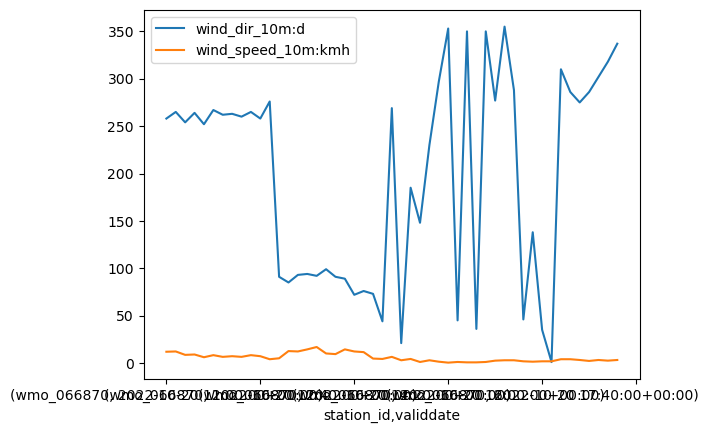

In [131]:
df_sd_coord